# Morphologic Transformations

### What are we doing on this module:
* We will use OpenCV to read an RGB image (REMEMBER: OpenCV loads them as BGR).
* Convert it to grayscale to reduce information
* Use Otsu's Threshold method to binarize the image
* Explore and experiment with the following morphological transformations:
    * Erosion
    * Dilation
    * Closing
    * Opening

In [1]:
# Installing libraries
!pip install opencv-python
!pip install matplotlib

In [2]:
# Bsic imports 
import cv2 # OpenCV
import matplotlib.pyplot as plt
import os 

In [ ]:
!wget https://sanfersa.blob.core.windows.net/assets/assets.zip
!unzip assets.zip

In [3]:
asset_library =    os.path.join(os.getcwd(), 'assets')

In [4]:
# Read image
img_path = os.path.join(asset_library, 'coins.png') # assets/coins.png
image_BGR = cv2.imread(img_path)

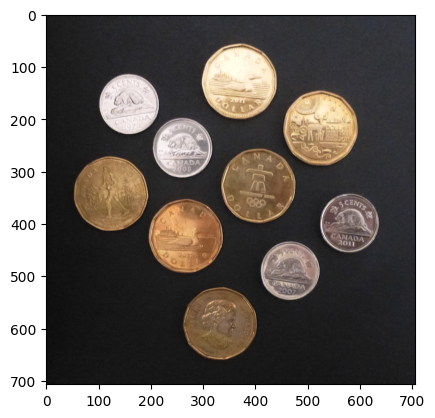

In [5]:
# Show the image
plt.imshow(cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB), cmap='gray')

# Binarizing the image
It is usually necessary to convert a color image to grayscale before attempting to binarize it, specially for choosing a proper threshold when doing it manually.

In [6]:
# Convert to grayscale
image_GRAY = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)

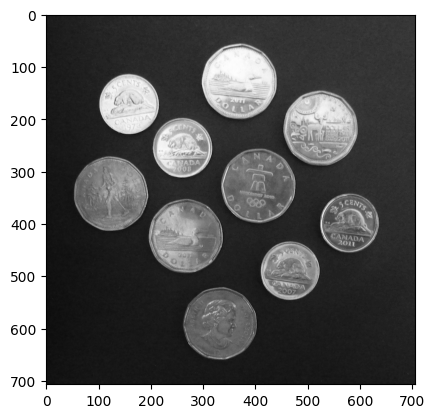

In [7]:
# Show the image
plt.imshow(image_GRAY, cmap='gray')

For this example we're going to use the Otsu method for thresholding, which is an "automatic" way of determining the most optimal threshold based on the image histogram.

To do so in OpenCV we use the following function.

In [8]:
# Thresholding
ret, image_bin = cv2.threshold(image_GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f'Threshold: {ret}')

Threshold: 101.0


It returns both the threshold value used and the binarized image.

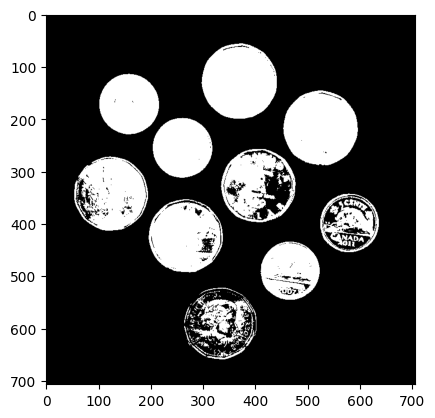

In [9]:
# Show the image
plt.imshow(image_bin, cmap='gray')

## Erosion
First we're gonna play with the ***erosion*** operation. As we've mentioned, this method reduces the white areas of the image, that is to say, the borders of objects.

On the following cell we've prepared everything you need to carry out this operation. We encourage you to play with both the kernel shape and size to see how it affects the results.

In [10]:
# Kernel shapes. These are the available kernel shapes for OpenCV's getStructuringElement function
kernel_shapes = {
    "rectangle": cv2.MORPH_RECT,
    "ellipse": cv2.MORPH_ELLIPSE,
    "cross": cv2.MORPH_CROSS,
}

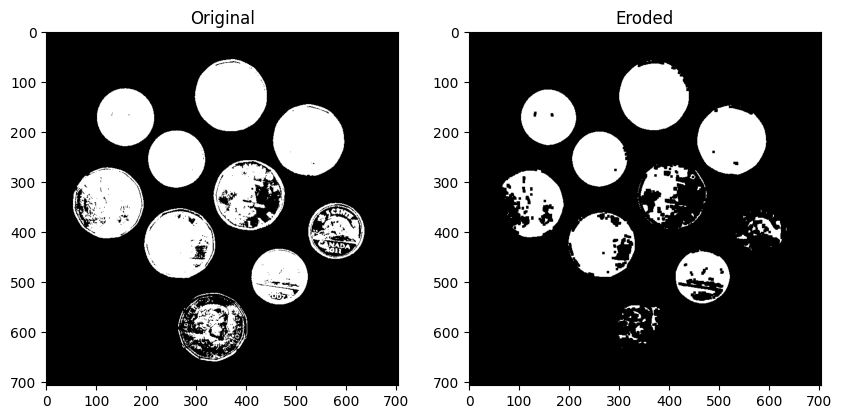

In [23]:
# Erosion parameters
kernel_shape = 'rectangle' #@param ['rectangle', 'ellipse', 'cross']
kernel_size = 5 #@param {type:"slider", min:1, max:101, step:2}

# Erosion
kernel = cv2.getStructuringElement(
    kernel_shapes[kernel_shape], (kernel_size, kernel_size)
)
image_eroded = cv2.erode(image_bin, kernel, iterations=1)

# Show the original and the eroded image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_bin, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_eroded, cmap='gray')
plt.title('Eroded')
plt.show()

## Dilation
Now we're gonna see about the ***dilation*** operation. As we've mentioned, this method increments the white areas of the image, that is to say, the borders of objects.

On the following cell we've prepared everything you need to carry out this operation. We encourage you to play with both the kernel shape and size to see how it affects the results.

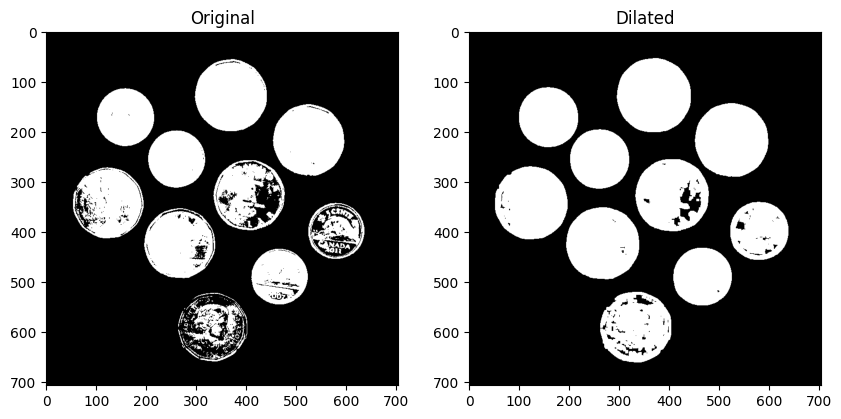

In [24]:
# Dilation parameters
kernel_shape = 'rectangle' #@param ['rectangle', 'ellipse', 'cross']
kernel_size = 5 #@param {type:"slider", min:1, max:101, step:2}

# Dilation
kernel = cv2.getStructuringElement(
    kernel_shapes[kernel_shape], (kernel_size, kernel_size)
)
image_dilated = cv2.dilate(image_bin, kernel, iterations=1)

# Show the original and the dilated image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_bin, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_dilated, cmap='gray')
plt.title('Dilated')
plt.show()

## Closing
Now we're going to look at the ***closing*** operation. As we've mentioned, this method consists of first dilating the image to then erode it back. By doing this, small gaps or "holes" (black spots) on the image will disappear, hence the name "closing" as in "closing the holes". Meanwhile, large areas will remain the same.

First we're going to see how to do it step by step.

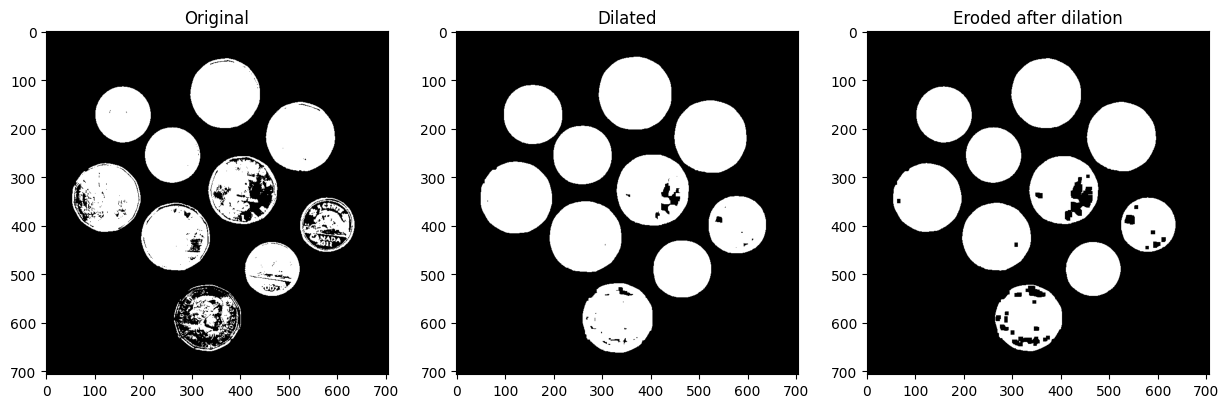

In [15]:
# First we dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
image_dilated = cv2.dilate(image_bin, kernel, iterations=1)

# Then we erode
image_eroded = cv2.erode(image_dilated, kernel, iterations=1)

# Show the original, dilated and eroded image
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image_bin, cmap='gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(image_dilated, cmap='gray')
plt.title('Dilated')
plt.subplot(1, 3, 3)
plt.imshow(image_eroded, cmap='gray')
plt.title('Eroded after dilation')
plt.show()

As you can see, some of the "holes" inside the coins have been "filled", while the coins themselves maintained their original sizes. This works, however, OpenCV has a much easier way to carry out closing.

We encourage you to play with the following cell and attempt to fill as many holes as possible, without disturbing the original nature of the image (without joining the individual coins).

Text(0.5, 1.0, 'Closed')

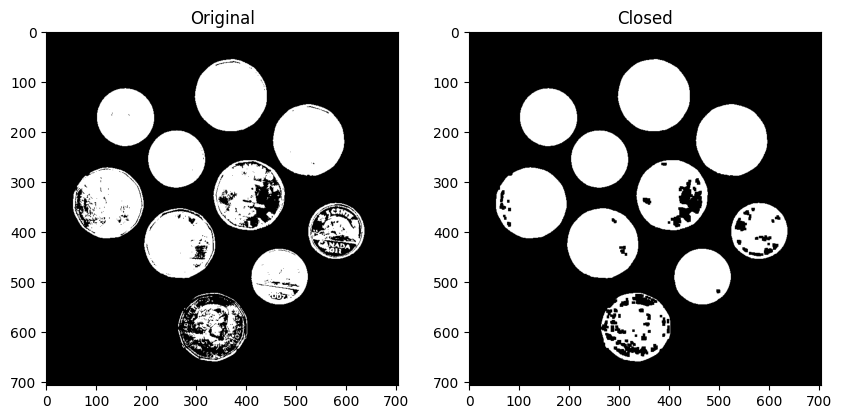

In [25]:
# Closing parameters
kernel_shape = 'rectangle' #@param ['rectangle', 'ellipse', 'cross']
kernel_size = 5 #@param {type:"slider", min:1, max:101, step:2}

# Closing
kernel = cv2.getStructuringElement(
    kernel_shapes[kernel_shape], (kernel_size, kernel_size)
)
image_closed = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)

# Show the original and the closed image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_bin, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(image_closed, cmap='gray')
plt.title('Closed')

## Opening
Finally we've reached the ***opening*** operation. As we've mentioned, this method consists of first eroding the image to then dilate it back. By doing this, small white spots on the image will disappear, that is to say, the holes (black areas) will appear to grow, hence the name "opening" as in "opening the holes". Meanwhile, large areas will remain the same.

Once again, we'll first do it step by step.

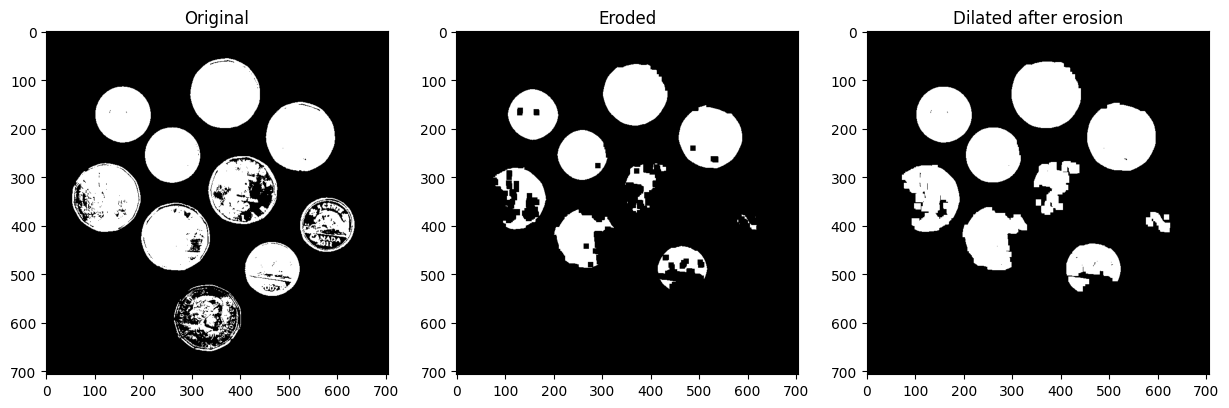

In [18]:
# First we erode
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
image_eroded = cv2.erode(image_bin, kernel, iterations=1)

# Then we dilate
image_dilated = cv2.dilate(image_eroded, kernel, iterations=1)

# Show the original, eroded and dilated image
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image_bin, cmap='gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(image_eroded, cmap='gray')
plt.title('Eroded')
plt.subplot(1, 3, 3)
plt.imshow(image_dilated, cmap='gray')
plt.title('Dilated after erosion')
plt.show()

Now we see how small white areas didn't survive the operation, as if the holes within them had "opened" and gobbled them up.

As you can imagine, there is also a simpler way to do this using OpenCV. However, to make this more engaging, first we'll introduce small noise into a closed version of the image.

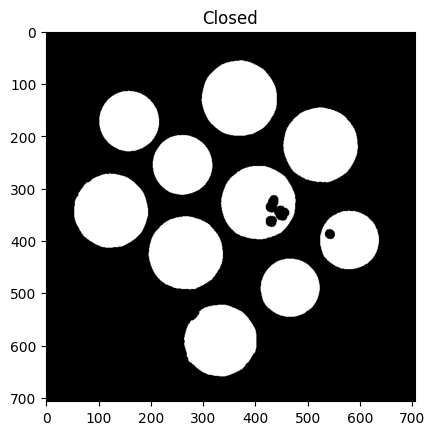

In [19]:
# Close
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
image_closed = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)

# Show the closed image
plt.imshow(image_closed, cmap='gray')
plt.title('Closed')
plt.show()

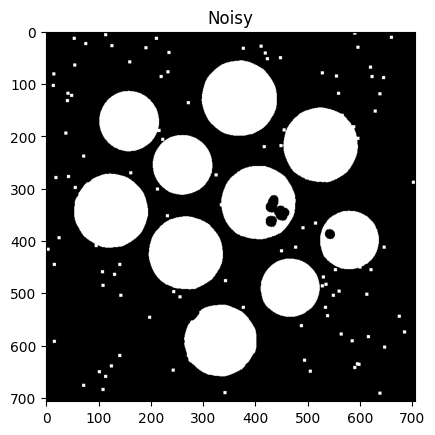

In [20]:
# Add noise
import numpy as np
image_closed_noisy = np.copy(image_closed)
padding = 3
for i in range(150):
    x = np.random.randint(0, image_closed_noisy.shape[0])
    y = np.random.randint(0, image_closed_noisy.shape[1])
    image_closed_noisy[
        max(0, x - padding):min(image_closed_noisy.shape[0], x + padding),
        max(0, y - padding):min(image_closed_noisy.shape[1], y + padding)
    ] = 255

# Show the noisy image
plt.imshow(image_closed_noisy, cmap='gray')
plt.title('Noisy')
plt.show()

Now we encourage you to play with the following parameters to attempt to eliminate as much noise as possible without losing the original coins.

In [21]:
# Opening parameters
kernel_shape = 'rectangle' #@param ['rectangle', 'ellipse', 'cross']
kernel_size = 5 #@param {type:"slider", min:1, max:101, step:2}

# Opening
kernel = cv2.getStructuringElement(
    kernel_shapes[kernel_shape], (kernel_size, kernel_size)
)
image_opened = cv2.morphologyEx(image_closed_noisy, cv2.MORPH_OPEN, kernel)

# Show the noisy and the opened image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_closed_noisy, cmap='gray')
plt.title('Noisy')
plt.subplot(1, 2, 2)
plt.imshow(image_opened, cmap='gray')
plt.title('Opened')
plt.show()